In [11]:
import os
import cv2
import numpy as np
import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# 定义常量
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

# 定义数据集路径（真实和虚假图像）
train_data_dir = '../input/real-vs-fake/train'
validation_data_dir = '../input/real-vs-fake/valid'

In [13]:
# model = keras.Sequential()
# # 添加卷积层，使用32个3x3的卷积核，激活函数为ReLU，输入形状为指定的图像大小和颜色通道
# model.add(layers.Conv2D(32, (3, 3),padding="same", activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
# # 添加最大池化层，池化窗口大小为2x2
# model.add(layers.MaxPooling2D((2, 2)))
# # 添加卷积层，使用64个3x3的卷积核，激活函数为ReLU
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# # 添加最大池化层，池化窗口大小为2x2
# model.add(layers.MaxPooling2D((2, 2)))
# # 添加卷积层，使用128个3x3的卷积核，激活函数为ReLU
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# # 添加最大池化层，池化窗口大小为2x2
# model.add(layers.MaxPooling2D((2, 2)))

# # 添加Dropout层，丢弃率为25%
# model.add(layers.Dropout(0.25))

# # 将多维输入一维化
# model.add(layers.Flatten())
# # 添加全连接层，包含128个神经元，激活函数为ReLU
# model.add(layers.Dense(128, activation='relu'))

# # 添加Dropout层，丢弃率为20% (50%)
# model.add(layers.Dropout(0.2))

# # 添加输出层，包含1个神经元，激活函数为Sigmoid
# model.add(layers.Dense(1, activation='sigmoid'))  # 输出层，单神经元用于二元分类

# # 编译模型
# # 配置模型的优化器、损失函数和评估指标
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [15]:
# 使用 ImageDataGenerator 准备数据
# 创建图像数据生成器，用于训练数据的归一化处理
train_datagen = ImageDataGenerator(rescale=1./255)
# 创建图像数据生成器，用于验证数据的归一化处理
validation_datagen = ImageDataGenerator(rescale=1./255)
# 从目录中生成训练数据的批处理生成器
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 从目录中生成验证数据的批处理生成器
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)est_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Ensure test data is not shuffled
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [18]:
# 在训练生成器上拟合模型并定义训练过程
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/20
3125/3125 [==============================] - 310s 99ms/step - loss: 0.1393 - accuracy: 0.9539 - val_loss: 0.2209 - val_accuracy: 0.9274
Epoch 2/20
3125/3125 [==============================] - 319s 102ms/step - loss: 0.1432 - accuracy: 0.9531 - val_loss: 0.2006 - val_accuracy: 0.9360
Epoch 3/20
3125/3125 [==============================] - 339s 108ms/step - loss: 0.1430 - accuracy: 0.9539 - val_loss: 0.1842 - val_accuracy: 0.9329
Epoch 4/20
3125/3125 [==============================] - 317s 101ms/step - loss: 0.1426 - accuracy: 0.9536 - val_loss: 0.1692 - val_accuracy: 0.9556
Epoch 5/20
3125/3125 [==============================] - 316s 101ms/step - loss: 0.1498 - accuracy: 0.9517 - val_loss: 0.1501 - val_accuracy: 0.9506
Epoch 6/20
3125/3125 [==============================] - 232s 74ms/step - loss: 0.1488 - accuracy: 0.9518 - val_loss: 0.2006 - val_accuracy: 0.9420
Epoch 7/20
3125/3125 [==============================] - 161s 52ms/step - loss: 0.1497 - accuracy: 0.9515 - val_los

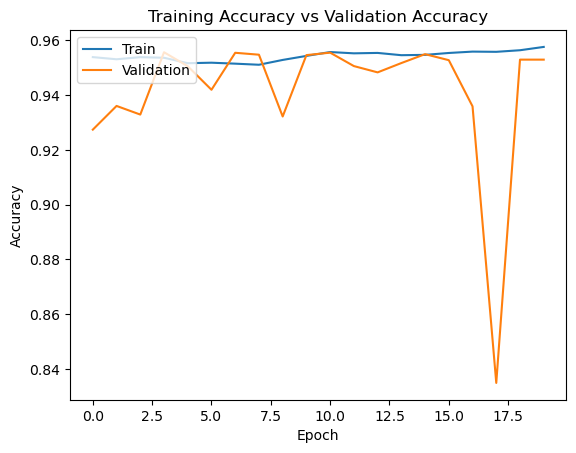

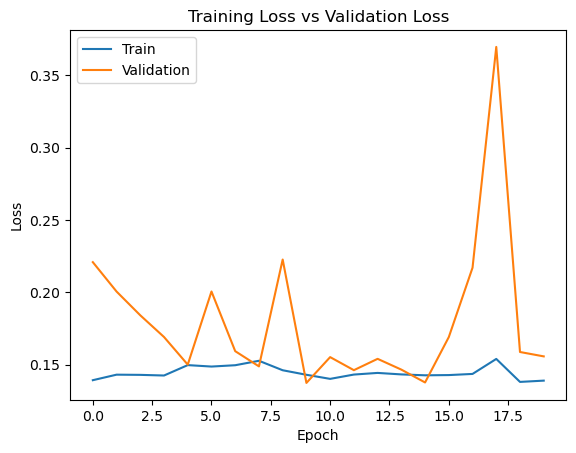

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
# 定义数据集路径（真实和虚假图像）
train_data_dir = '../input/real-vs-fake/train'
validation_data_dir = '../input/real-vs-fake/valid'
test_data_dir = '../input/real-vs-fake/test'

val_test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = val_test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Ensure test data is not shuffled
)

Found 20000 images belonging to 2 classes.


In [26]:
test_metrics = model.evaluate(test_generator)
print("Test metrics:", test_metrics[1])

625/625 [==============================] - 32s 51ms/step - loss: 0.1504 - accuracy: 0.9528
Test metrics: 0.9528499841690063


In [27]:
model.save('../output/model3.h5')